In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import nltk 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords 
from nltk import word_tokenize
import re
#nltk.download() download Corpora stopwords and Wordsnet
import seaborn as sns


In [30]:
df=pd.read_csv("mbti_1.csv")
print(df.head(8))


   type                                              posts
0  INFJ  'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1  ENTP  'I'm finding the lack of me in these posts ver...
2  INTP  'Good one  _____   https://www.youtube.com/wat...
3  INTJ  'Dear INTP,   I enjoyed our conversation the o...
4  ENTJ  'You're fired.|||That's another silly misconce...
5  INTJ  '18/37 @.@|||Science  is not perfect. No scien...
6  INFJ  'No, I can't draw on my own nails (haha). Thos...
7  INTJ  'I tend to build up a collection of things on ...


In [31]:
def row_parse(row):
    l=[]
    for i in row.split("|||"):
        l.append(len(i.split()))
    return np.var(l)
df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df.head()

,type,posts,words_per_comment
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34


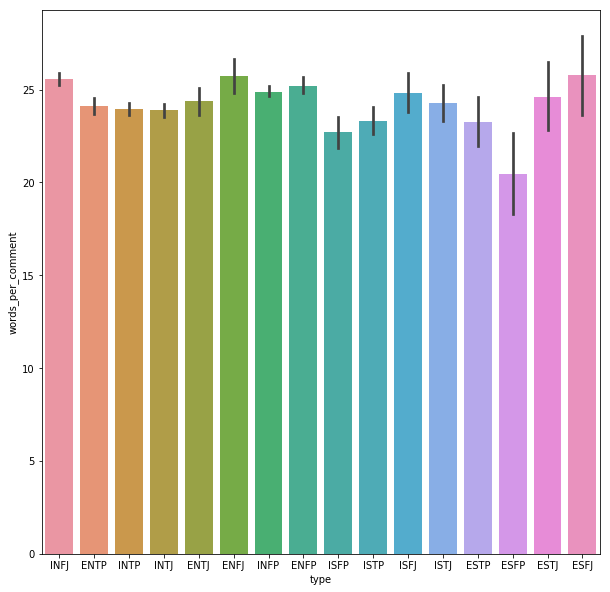

In [32]:
plt.figure(figsize=(10,10))
sns.barplot("type","words_per_comment",data=df)
plt.show()



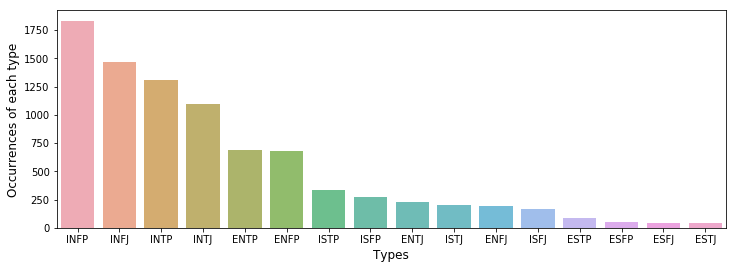

In [33]:
cnt_types = df['type'].value_counts()

plt.figure(figsize=(12,4))
sns.barplot(cnt_types.index, cnt_types.values, alpha=0.8)
plt.ylabel('Occurrences of each type', fontsize=12)
plt.xlabel('Types', fontsize=12)
plt.show()


In [34]:
def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = "I"
    elif t[0] == 'E': I ="E"
    else: print('I-E mismatch')
        
    if t[1] == 'N': N = "N"
    elif t[1] == 'S': N = "S"
    else: print('N-S mismatch')
        
    if t[2] == 'T': T = "T"
    elif t[2] == 'F': T = "F"
    else: print('T-F mismatch')
        
    if t[3] == 'J': J = "J"
    elif t[3] == 'P': J = "P"
    else: print('J-P mismatch')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

df = df.join(df.apply (lambda row: get_types (row),axis=1))
df.head(5)

,type,posts,words_per_comment,IE,JP,NS,TF
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,11.12,I,J,N,F
1,ENTP,'I'm finding the lack of me in these posts ver...,23.40,E,P,N,T
2,INTP,'Good one _____ https://www.youtube.com/wat...,16.72,I,P,N,T
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",21.28,I,J,N,T
4,ENTJ,'You're fired.|||That's another silly misconce...,19.34,E,J,N,T


In [35]:
print("Introversion (I): ", df['IE'].value_counts()[0])
print("Extroversion (E): ", df['IE'].value_counts()[1])
print("Intuition (N)   : ",df["NS"].value_counts()[0])
print("Sensing (S)     : ",df["NS"].value_counts()[1])
print("Thinking (T)    : ",df["TF"].value_counts()[0])
print("Feeling (F)     : ",df["TF"].value_counts()[1])
print("Judging (J)     : ",df["JP"].value_counts()[0])
print("Percieving (P)  : ",df["JP"].value_counts()[1])

Introversion (I):  6676
Extroversion (E):  1999
Intuition (N)   :  7478
Sensing (S)     :  1197
Thinking (T)    :  4694
Feeling (F)     :  3981
Judging (J)     :  5241
Percieving (P)  :  3434


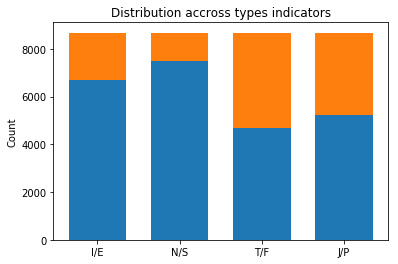

In [36]:
N = 4
bot = (df['IE'].value_counts()[0], df['NS'].value_counts()[0], df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top = (df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[1])

loc = np.arange(N)    # the x locations for the groups
width = 0.7      # the width of the bars: can also be len(x) sequence

p1 = plt.bar(loc, bot, width)
p2 = plt.bar(loc, top, width ,bottom=bot)

plt.ylabel('Count')
plt.title('Distribution accross types indicators')
plt.xticks(loc, ('I/E',  'N/S', 'T/F', 'J/P',))

plt.show()

In [38]:
df[['IE','NS','TF','JP']]



,IE,NS,TF,JP
0,I,N,F,J
1,E,N,T,P
2,I,N,T,P
3,I,N,T,J
4,E,N,T,J
5,I,N,T,J
6,I,N,F,J
7,I,N,T,J
8,I,N,F,J
9,I,N,T,P


In [43]:
#Binarization of MBTI set
bin_Pers = {'I':0, 'E':1, 'N':0, 'S':1, 'F':0, 'T':1, 'J':0, 'P':1}
bin_Pers_list = [{0:'I', 1:'E'}, {0:'N', 1:'S'}, {0:'F', 1:'T'}, {0:'J', 1:'P'}]

def translate_personality(personality):
    # transform mbti to binary vector
    
    return [bin_Pers[l] for l in personality]

def translate_back(personality):
    # transform binary vector to mbti personality
    
    s = ""
    for i, l in enumerate(personality):
        s += bin_Pers_list[i][l]
    return s

# Check ...
d = df.head(4)
list_personality_bin = np.array([translate_personality(p) for p in d.type])
print("Binarize MBTI list: \n%s" % list_personality_bin)


Binarize MBTI list: 
[[0 0 0 0]
 [1 0 1 1]
 [0 0 1 1]
 [0 0 1 0]]


In [44]:



personality_type_list = ['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ']
  
personality_type_list = [x.lower() for x in personality_type_list]


# Lemmatize
stemmer = PorterStemmer()
lemmatiser = WordNetLemmatizer()

# Cache the stop words for speed 
StopWords = stopwords.words("english")

def pre_process_data(data, remove_stop_words=True, remove_mbti_profiles=True):

    list_personality = []
    list_posts = []
    len_data = len(df)
    i=0
    
    for row in data.iterrows():
        i+=1
        if (i % 500 == 0 or i == 1 or i == len_data):
            print("%s of %s rows" % (i, len_data))

        ##### Remove and clean comments
        posts = row[1].posts
        temp = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ', posts)
        temp = re.sub("[^a-zA-Z]", " ", temp)
        temp = re.sub(' +', ' ', temp).lower()
        if remove_stop_words:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ') if w not in StopWords])
        else:
            temp = " ".join([lemmatiser.lemmatize(w) for w in temp.split(' ')])
            
        if remove_mbti_profiles:
            for t in personality_type_list:
                temp = temp.replace(t,"")

        labelized_type = translate_personality(row[1].type)
        list_personality.append(labelized_type)
        list_posts.append(temp)

    list_posts = np.array(list_posts)
    list_personality = np.array(list_personality)
    return list_posts, list_personality

In [46]:
list_posts, list_personality  = pre_process_data(df, remove_stop_words=True)

1 of 8675 rows
500 of 8675 rows
1000 of 8675 rows
1500 of 8675 rows
2000 of 8675 rows
2500 of 8675 rows
3000 of 8675 rows
3500 of 8675 rows
4000 of 8675 rows
4500 of 8675 rows
5000 of 8675 rows
5500 of 8675 rows
6000 of 8675 rows
6500 of 8675 rows
7000 of 8675 rows
7500 of 8675 rows
8000 of 8675 rows
8500 of 8675 rows
8675 of 8675 rows


In [47]:
print("Number of  posts and personalities: ",  list_posts.shape, list_personality.shape)
list_posts[0]
list_personality[0]

Number of  posts and personalities:  (8675,) (8675, 4)


array([0, 0, 0, 0])

In [48]:
#Keep words appearing in 10% to 70 % of the posts.*/
#feature extraction from the posts i.e., key words

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

# Posts to a matrix of token counts
cntizer = CountVectorizer(analyzer="word", 
                             max_features=1500, 
                             stop_words=None,  
                             max_df=0.7,
                             min_df=0.1) 

# Learn the vocabulary dictionary and return term-document matrix
print("CountVectorizer...")
X_cnt = cntizer.fit_transform(list_posts)

# Transform the count matrix to a normalized tf or tf-idf representation
tfizer = TfidfTransformer()

print("Tf-idf...")
# Learn the idf vector (fit) and transform a count matrix to a tf-idf representation
X_tfidf =  tfizer.fit_transform(X_cnt).toarray()


CountVectorizer...
Tf-idf...


In [49]:
feature_names = list(enumerate(cntizer.get_feature_names()))
feature_names
X_tfidf.shape


(8675, 791)

In [50]:
print("X: Posts in tf-idf representation \n* 1st row:\n%s" % X_tfidf[0])


X: Posts in tf-idf representation 
* 1st row:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.08042209  0.06830218  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.10331537  0.          0.04973404
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.10984584  0.          0.          0.          0.08642509  0.          0.
  0.10488948  0.          0.          0.          0.          0.
  0.05188886  0.06824736  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.      

In [51]:
type_indicators = [ "IE: Introversion (I) / Extroversion (E)", "NS: Intuition (N) – Sensing (S)", 
                   "FT: Feeling (F) - Thinking (T)", "JP: Judging (J) – Perceiving (P)"  ]

for l in range(len(type_indicators)):
    print(type_indicators[l])
        

IE: Introversion (I) / Extroversion (E)
NS: Intuition (N) – Sensing (S)
FT: Feeling (F) - Thinking (T)
JP: Judging (J) – Perceiving (P)


In [52]:
print("MBTI 1st row: %s" % translate_back(list_personality[0,:]))
print("Y: Binarized MBTI 1st row: %s" % list_personality[0,:])


MBTI 1st row: INFJ
Y: Binarized MBTI 1st row: [0 0 0 0]


In [53]:
#XGBoost used to fine tune the machine in learning
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Posts in tf-idf representation
X = X_tfidf

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    # Let's train type indicator individually
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    model.fit(X_train, y_train)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 78.17%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 86.06%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 71.78%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.70%


In [54]:
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier()
    eval_set = [(X_test, y_test)]
    model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))

IE: Introversion (I) / Extroversion (E) ...
[0]	validation_0-logloss:0.662331
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.637307
[2]	validation_0-logloss:0.616979
[3]	validation_0-logloss:0.600483
[4]	validation_0-logloss:0.585568
[5]	validation_0-logloss:0.573552
[6]	validation_0-logloss:0.564016
[7]	validation_0-logloss:0.555667
[8]	validation_0-logloss:0.548621
[9]	validation_0-logloss:0.542487
[10]	validation_0-logloss:0.537856
[11]	validation_0-logloss:0.533571
[12]	validation_0-logloss:0.529929
[13]	validation_0-logloss:0.526731
[14]	validation_0-logloss:0.523933
[15]	validation_0-logloss:0.521377
[16]	validation_0-logloss:0.519125
[17]	validation_0-logloss:0.517464
[18]	validation_0-logloss:0.515545
[19]	validation_0-logloss:0.514147
[20]	validation_0-logloss:0.512725
[21]	validation_0-logloss:0.511898
[22]	validation_0-logloss:0.510745
[23]	validation_0-logloss:0.50952
[24]	validation_0-logloss:0.508703
[25]	validation_0-loglos

[24]	validation_0-logloss:0.617105
[25]	validation_0-logloss:0.615611
[26]	validation_0-logloss:0.614606
[27]	validation_0-logloss:0.612685
[28]	validation_0-logloss:0.611047
[29]	validation_0-logloss:0.609578
[30]	validation_0-logloss:0.608736
[31]	validation_0-logloss:0.607638
[32]	validation_0-logloss:0.606005
[33]	validation_0-logloss:0.604399
[34]	validation_0-logloss:0.603225
[35]	validation_0-logloss:0.601777
[36]	validation_0-logloss:0.600576
[37]	validation_0-logloss:0.599288
[38]	validation_0-logloss:0.598361
[39]	validation_0-logloss:0.59679
[40]	validation_0-logloss:0.595524
[41]	validation_0-logloss:0.594332
[42]	validation_0-logloss:0.593456
[43]	validation_0-logloss:0.59237
[44]	validation_0-logloss:0.591068
[45]	validation_0-logloss:0.589851
[46]	validation_0-logloss:0.588608
[47]	validation_0-logloss:0.587813
[48]	validation_0-logloss:0.586749
[49]	validation_0-logloss:0.585916
[50]	validation_0-logloss:0.585181
[51]	validation_0-logloss:0.584325
[52]	validation_0-logl

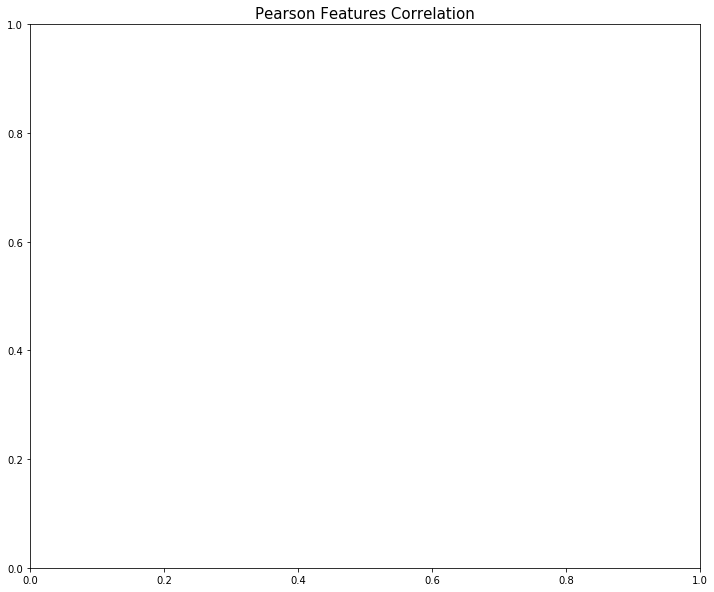

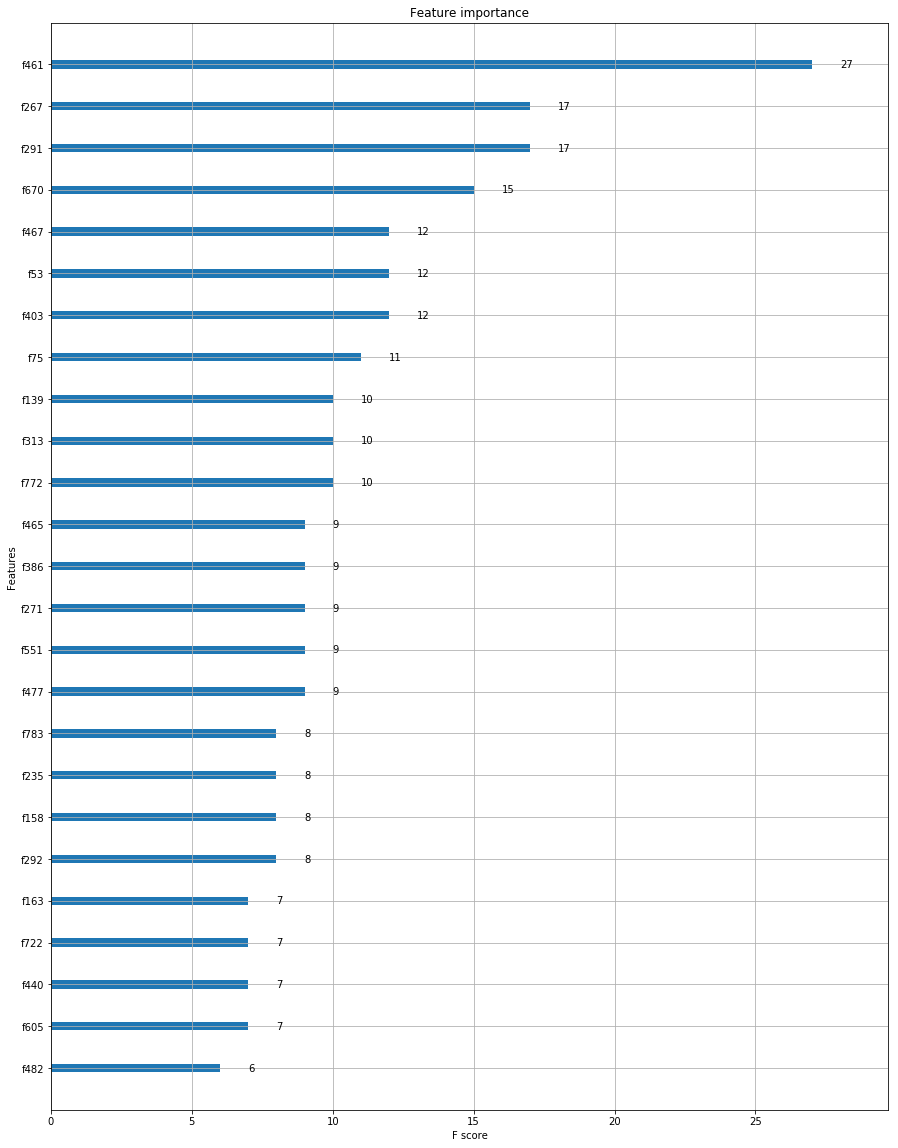

In [55]:
from xgboost import plot_importance

# Only the 1st indicator
y = list_personality[:,0]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
# plot feature importance
ax = plot_importance(model, max_num_features=25)

figure = ax.figure
figure.set_size_inches(15, 20)

plt.show()

In [56]:
features = sorted(list(enumerate(model.feature_importances_)), key=lambda x: x[1], reverse=True)
for f in features[0:25]:
    print("%d\t%f\t%s" % (f[0],f[1],cntizer.get_feature_names()[f[0]]))
    
# Save xgb_params for late discussuin
default_get_xgb_params = model.get_xgb_params()

461	0.039074	ne
267	0.024602	fun
291	0.024602	guy
670	0.021708	super
53	0.017366	awesome
403	0.017366	lol
467	0.017366	ni
75	0.015919	bored
139	0.014472	crazy
313	0.014472	hey
772	0.014472	world
271	0.013025	game
386	0.013025	let
465	0.013025	new
477	0.013025	nt
551	0.013025	quiet
158	0.011577	debate
235	0.011577	family
292	0.011577	haha
783	0.011577	xd
163	0.010130	definitely
440	0.010130	mind
605	0.010130	shit
722	0.010130	turn
229	0.008683	eye


In [57]:
# Save xgb_params for later discussuin
default_get_xgb_params = model.get_xgb_params()
print (default_get_xgb_params)

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'nthread': 1, 'objective': 'binary:logistic', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': 0, 'silent': 1, 'subsample': 1}


In [58]:
#setup parameters for xgboost
param = {}

param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    # make predictions for test data
    y_pred = model.predict(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("* %s Accuracy: %.2f%%" % (type_indicators[l], accuracy * 100.0))


IE: Introversion (I) / Extroversion (E) ...
* IE: Introversion (I) / Extroversion (E) Accuracy: 79.01%
NS: Intuition (N) – Sensing (S) ...
* NS: Intuition (N) – Sensing (S) Accuracy: 85.96%
FT: Feeling (F) - Thinking (T) ...
* FT: Feeling (F) - Thinking (T) Accuracy: 74.19%
JP: Judging (J) – Perceiving (P) ...
* JP: Judging (J) – Perceiving (P) Accuracy: 65.42%


In [ ]:
# Tune learning_rate
#from numpy import loadtxt
#from xgboost import XGBClassifier
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import StratifiedKFold

# Posts in tf-idf representation
#X = X_tfidf

# setup parameters for xgboost
#param = {}
#param['n_estimators'] = 200
#param['max_depth'] = 2
#param['nthread'] = 8
#param['learning_rate'] = 0.2


# Let's train type indicator individually
#for l in range(len(type_indicators)):
#    print("%s ..." % (type_indicators[l]))
#    
#    Y = list_personality[:,l]
#    model = XGBClassifier(**param)
#    
#    param_grid = {
#        'n_estimators' : [ 200, 300],
#        'learning_rate': [ 0.2, 0.3]
        # 'learning_rate': [ 0.01, 0.1, 0.2, 0.3],
        # 'max_depth': [2,3,4],
#    }
    
    
#    kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
#    grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
#    grid_result = grid_search.fit(X, Y)
#
    # summarize results
#    print("* Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#    means = grid_result.cv_results_['mean_test_score']
#    stds = grid_result.cv_results_['std_test_score']
#    params = grid_result.cv_results_['params']
 #   for mean, stdev, param in zip(means, stds, params):
#        print("* %f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# A few few tweets and a sample blog post
my_posts  = """Getting started with data science and applying machine learning has never been as simple as it is now. There are many free and paid online tutorials and courses out there to help you to get started. I’ve recently started to learn, play, and work on Data Science & Machine Learning on Kaggle.com. In this brief post, I’d like to share my experience with the Kaggle Python Docker image, which simplifies the Data Scientist’s life.
Awesome #AWS monitoring introduction.
HPE Software (now @MicroFocusSW) won the platinum reader's choice #ITAWARDS 2017 in the new category #CloudMonitoring
Certified as AWS Certified Solutions Architect 
Hi, please have a look at my Udacity interview about online learning and machine learning,
Very interesting to see the  lessons learnt during the HP Operations Orchestration to CloudSlang journey. http://bit.ly/1Xo41ci 
I came across a post on devopsdigest.com and need your input: “70% DevOps organizations Unhappy with DevOps Monitoring Tools”
In a similar investigation I found out that many DevOps organizations use several monitoring tools in parallel. Senu, Nagios, LogStach and SaaS offerings such as DataDog or SignalFX to name a few. However, one element is missing: Consolidation of alerts and status in a single pane of glass, which enables fast remediation of application and infrastructure uptime and performance issues.
Sure, there are commercial tools on the market for exactly this use case but these tools are not necessarily optimized for DevOps.
So, here my question to you: In your DevOps project, have you encountered that the lack of consolidation of alerts and status is a real issue? If yes, how did you approach the problem? Or is an ChatOps approach just right?
You will probably hear more and more about ChatOps - at conferences, DevOps meet-ups or simply from your co-worker at the coffee station. ChatOps is a term and concept coined by GitHub. It's about the conversation-driven development, automation, and operations.
Now the question is: why and how would I, as an ops-focused engineer, implement and use ChatOps in my organization? The next question then is: How to include my tools into the chat conversation?
Let’s begin by having a look at a use case. The Closed Looped Incidents Process (CLIP) can be rejuvenated with ChatOps. The work from the incident detection runs through monitoring until the resolution of issues in your application or infrastructure can be accelerated with improved, cross-team communication and collaboration.
In this blog post, I am going to describe and share my experience with deploying HP Operations Manager i 10.0 (OMi) on HP Helion Public Cloud. An Infrastructure as a Service platform such as HP Helion Public Cloud Compute is a great place to quickly spin-up a Linux server and install HP Operations Manager i for various use scenarios. An example of a good use case is monitoring workloads across public clouds such as AWS and Azure.
"""

# The type is just a dummy so that the data prep fucntion can be reused
mydata = pd.DataFrame(data={'type': ['INFJ'], 'posts': [my_posts]})

my_posts, dummy  = pre_process_data(mydata, remove_stop_words=True)

my_X_cnt = cntizer.transform(my_posts)
my_X_tfidf =  tfizer.transform(my_X_cnt).toarray()

In [ ]:
# setup parameters for xgboost
param = {}
param['n_estimators'] = 200
param['max_depth'] = 2
param['nthread'] = 8
param['learning_rate'] = 0.2

result = []
# Let's train type indicator individually
for l in range(len(type_indicators)):
    print("%s ..." % (type_indicators[l]))
    
    Y = list_personality[:,l]

    # split data into train and test sets
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

    # fit model on training data
    model = XGBClassifier(**param)
    model.fit(X_train, y_train)
    
    # make predictions for my  data
    y_pred = model.predict(my_X_tfidf)
    result.append(y_pred[0])
    # print("* %s prediction: %s" % (type_indicators[l], y_pred))

In [ ]:
print("The result is: ", translate_back(result))